# CPNatal 2018

### Web Crawlers: Acessando Websites e Rede Sociais com Python
### Gileno Alves Santa Cruz Filho

### Gileno, quem?

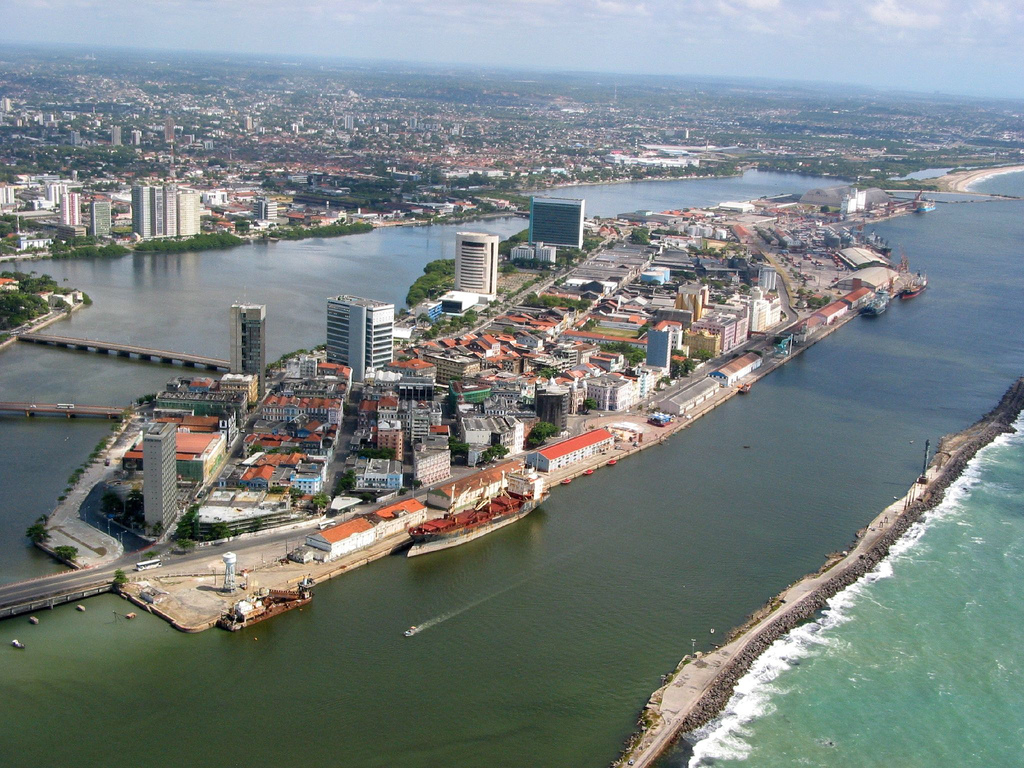

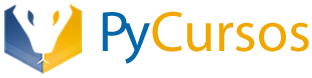

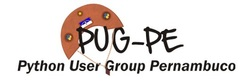

## Informação é Poder

### Mais existe muita informação

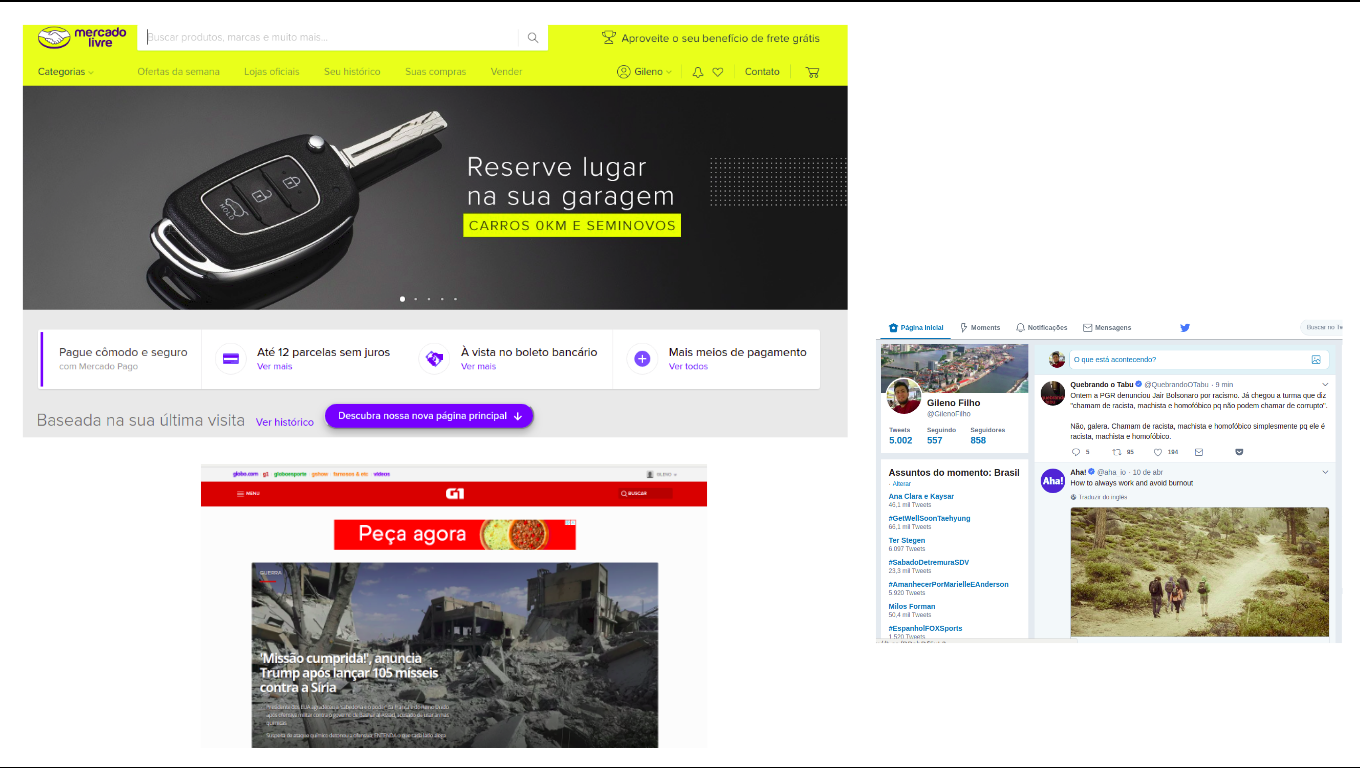

In [3]:
import requests_html
session = requests_html.HTMLSession()

In [ ]:
r = session.get("https://www.python.org")
print(r.text)

In [ ]:
# Megasena
url = 'http://www1.caixa.gov.br/loterias/loterias/megasena/megasena_pesquisa_new.asp'
r = session.get(url)
lista = r.html.find('ul')[0]
for li in lista.find("li"):
    print(li.text)

In [ ]:
# OLX
url = 'http://rn.olx.com.br/videogames'
r = session.get(url)
links = r.html.xpath("//a[contains(@class, 'OLXad-list-link')]")
for link in links:
    url_detalhes = link.attrs['href']
    print(url_detalhes)
    r_detalhes = session.get(url_detalhes)
    titulo = r_detalhes.html.xpath("//*[@id='ad_title']/text()")[0].strip()
    preco = r_detalhes.html.xpath("//*[@class='OLXad-price']/text()")[0].strip()
    print(titulo, preco)

In [1]:
# API's
import tokens

In [4]:
# Marvel
import hashlib
import pprint

url = 'http://gateway.marvel.com/v1/public/characters'
HASH = '1' + tokens.MARVEL_PRIVATE_KEY + tokens.MARVEL_PUBLIC_KEY
HASH = hashlib.md5(HASH.encode("utf8")).hexdigest()
r = session.get(url, params={'ts': 1, 'apikey': tokens.MARVEL_PUBLIC_KEY, 'hash': HASH})
pprint.pprint(r.json())

{'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © '
                    '2018 MARVEL</a>',
 'attributionText': 'Data provided by Marvel. © 2018 MARVEL',
 'code': 200,
 'copyright': '© 2018 MARVEL',
 'data': {'count': 20,
          'limit': 20,
          'offset': 0,
          'results': [{'comics': {'available': 12,
                                  'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1011334/comics',
                                  'items': [{'name': 'Avengers: The Initiative '
                                                     '(2007) #14',
                                             'resourceURI': 'http://gateway.marvel.com/v1/public/comics/21366'},
                                            {'name': 'Avengers: The Initiative '
                                                     '(2007) #14 (SPOTLIGHT '
                                                     'VARIANT)',
                                             'resourceU

                                             'resourceURI': 'http://gateway.marvel.com/v1/public/series/693'},
                                            {'name': 'Cable & Deadpool Vol. 2: '
                                                     'The Burnt Offering '
                                                     '(2007)',
                                             'resourceURI': 'http://gateway.marvel.com/v1/public/series/1338'}],
                                  'returned': 3},
                       'stories': {'available': 23,
                                   'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1011031/stories',
                                   'items': [{'name': 'AGENT X (2002) #15',
                                              'resourceURI': 'http://gateway.marvel.com/v1/public/stories/1135',
                                              'type': 'cover'},
                                             {'name': 'CABLE & DEADPOOL (2004) '
   

In [ ]:
# Twitter
from tapioca_twitter import Twitter

In [ ]:
api_twitter = Twitter(
    api_key=tokens.TWITTER_API_KEY,
    api_secret=tokens.TWITTER_API_SECRET,
    access_token=tokens.TWITTER_ACCESS_TOKEN,
    access_token_secret=tokens.TWITTER_ACCESS_SECRET
)

In [ ]:
resultado = api_twitter.statuses_home_timeline().get()
for tweet in resultado().data:
    print(tweet['text'])

In [ ]:
tweets = api_twitter.search_tweets().get(params={'q': '#CPNatal'})
for tweet in tweets().data['statuses']:
    print(tweet['text'])

In [ ]:
status = 'Palestrando na #CPNatal sobre WebCrawlers e API com Python'
statuses_update = api_twitter.statuses_update().post(params={'status': status})
print(statuses_update().data)

In [ ]:
# Facebook
from tapioca_facebook import Facebook

api_facebook = Facebook(
    client_id=tokens.FACEBOOK_CLIENT_ID, access_token=tokens.FACEBOOK_ACCESS_TOKEN
)

In [ ]:
likes = api_facebook.user_likes(id='me').get()
for like in likes().data:
    print(like)

In [ ]:
likes().data['paging']

In [ ]:
for like in likes().pages():
    print(like().data)

In [ ]:
feed = api_facebook.user_feed(id='me').get()
for post in feed().pages():
    print(post().data)

In [ ]:
message = 'Palestrando sobre Web Crawlers com Python na #CPNatal'
user_feed = api_facebook.user_feed(id='me').post(data={'message': message})
print(user_feed().data)

In [ ]:
# Uber
from uber_rides.session import Session
from uber_rides.client import UberRidesClient

uber_session = Session(server_token='qZLzWGMbxgTW4uZIlE0zZ7OA2oQRwV88qyVIyi3a')
uber_client = UberRidesClient(uber_session)

In [ ]:
response = uber_client.get_price_estimates(
    start_latitude=-8.1277971, 
    start_longitude=-34.9046107,
    end_latitude=-8.1176322,  
    end_longitude=-34.9054008236179,
    seat_count=2
)
estimate = response.json.get('prices')
print (estimate)
print (estimate[0]['display_name'], estimate[0]['estimate'])

In [ ]:
from selenium import webdriver

url = 'http://loterias.caixa.gov.br/wps/portal/loterias/landing/megasena/'

driver = webdriver.PhantomJS('phantomjs')

In [ ]:
driver.get(url)

In [ ]:
lista = driver.find_element_by_id("ulDezenas")
for dezena in lista.find_elements_by_tag_name("li"):
    print(dezena.text)

In [ ]:
anterior = driver.find_element_by_link_text("< Anterior")
anterior.click()

In [ ]:
lista = driver.find_element_by_id("ulDezenas")
for dezena in lista.find_elements_by_tag_name("li"):
    print(dezena.text)

## Obrigado

### @GilenoFilho
### http://www.gilenofilho.com.br
### http://www.pycursos.com